In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
nu = 0.1        
gamma = 0.0 # Set Gamma to be 0.0 for nows
L = 10.0
T = 1.0
Nx = 30  # Number of spatial points
Nt = 50  # Number of time points
dx = L / Nx
dt = T / Nt

# Initial condition function
def initial_condition(x):
    return np.sin(np.pi * x / L)

# Boundary condition function
def boundary_condition(t):
    return 0.0

# Function to solve the PDE using finite difference method
def solve_pde():
    
    # Initialize arrays
    u = np.zeros((Nt + 1, Nx + 1))
    u_xx = np.zeros((Nt + 1, Nx + 1))
    u_x = np.zeros((Nt + 1, Nx + 1))
    u_t = np.zeros((Nt + 1, Nx + 1))
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Set initial condition
    u[0, :] = initial_condition(x_values)

    # Iterate over time steps
    for n in range(Nt):
        # Apply boundary conditions
        u[n+1, 0] = boundary_condition(t_values[n+1])
        u[n+1, Nx] = boundary_condition(t_values[n+1])

        # Compute interior points using finite difference method
        for i in range(1, Nx):
            u_xx[n, i] = (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (dx**2)
            u_x[n, i] = (u[n, i+1] - u[n, i-1]) / (2*dx)
            u_t[n, i] = (u[n+1, i] - u[n, i]) / dt
            u[n+1, i] = u[n, i] - dt * (20 * nu * u_xx[n, i] - gamma * u[n, i] * (u[n, i]**2 - 1))

    return u, u_xx, u_x, u_t, x_values, t_values



In [29]:
u, u_xx, u_x, u_t, x_values, t_values = solve_pde()

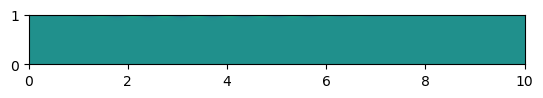

In [31]:
# plot u(x, t) using a density plot




